### Minimización de una función usando la técnica de descenso de gradiente

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import numpy as np
from matplotlib import pylab as plt
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

import grafica_Grad as gr
import math
import io

In [3]:
# PARAMETROS
alfa = 0.1  # proporción del gradiente a utilizar para modificar la posición actual
MAX_ITE = 100  # máxima cantidad de "pasos"
Cota_ERROR = 10e-06

In [4]:
# Iniciar en un punto aleatorio del dominio de la función
x = 1.5
y = 1.5

ite = 0
z = 1
z_new = x**2 * y * math.pi/3

puntos = []

diferencia = []
valorZ = [z_new]
while ((ite<MAX_ITE) and (np.abs(z - z_new)>Cota_ERROR)):
    z = z_new
    PtoAnt = [x, y, z]

    grad_x = 2 * x * y * math.pi/3   # derivada respecto de x
    grad_y = x**2 * math.pi/3   # derivada respecto de y
    
    x = x - alfa * grad_x
    y = y - alfa * grad_y
    z_new = x**2 * y * math.pi/3
  
    diferencia.append( np.abs(z - z_new) )
    valorZ.append(z_new)

    puntos.append([PtoAnt, [x, y, z_new]])
    ite = ite + 1


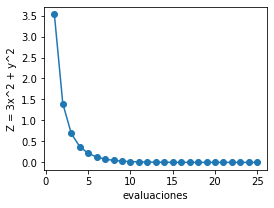

In [5]:
# El valor de la función debe ir disminuyendo
plt.plot(range(1, len(valorZ) + 1), valorZ, marker='o')
plt.xlabel('evaluaciones')
plt.ylabel('Z = 3x^2 + y^2')
plt.show()

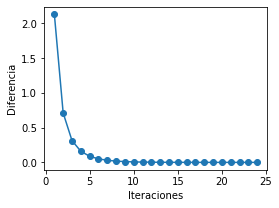

In [6]:
# La diferencia entre 2 valores consecutivos de la función debería tender a cero
plt.plot(range(1, len(diferencia) + 1), diferencia, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Diferencia')
plt.show()